In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [3]:
df = pd.read_csv('test_results.tsv', sep='\t', header=None)

In [4]:
df_real = pd.read_csv('../Data_preprocessed/test.tsv', sep='\t', index_col=0)

In [17]:
predictions = df.values.tolist()

In [19]:
y_pred = []
for pred in predictions:
    y_pred.append(pred.index(max(pred)))

In [21]:
y_test = list(df_real['label'])

In [23]:
def plot_confusion_matrix(cm, classes, output_file,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(10,10))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Wahre Klasse')
    plt.xlabel('Vorhergesagte Klasse')
    plt.tight_layout()
    plt.savefig(output_file)

Normalized confusion matrix
[[0.91 0.08 0.01]
 [0.03 0.95 0.02]
 [0.02 0.03 0.95]]


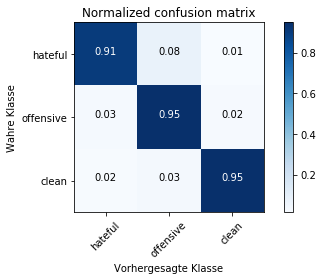

In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['hateful', 'offensive', 'clean'], output_file='bert.svg',normalize=True,
                      title='Normalized confusion matrix')

In [25]:
from sklearn.metrics import f1_score

macro = f1_score(y_test, y_pred, average='macro')  

micro = f1_score(y_test, y_pred, average='micro')  

weighted = f1_score(y_test, y_pred, average='weighted')

In [26]:
print('F1 Score')
print("macro:\t",macro, '\tmicro:\t', micro, '\tweighted:\t', weighted )

F1 Score
macro:	 0.9341283585874017 	micro:	 0.934 	weighted:	 0.9341283585874016
